## Titanic - Machine Learning from Disaster
### Problem Statement: Predict survival on the Titanic and get familiar with ML basics

### Import Libraries

In [61]:
import pandas as pd                    ## Read, Data Manipulation 
import numpy as np                     ## Numerical Calculation, work with array

import matplotlib.pyplot as plt        ## Data Visualisation
import seaborn as sns                  ## Data Visualisation
%matplotlib inline                     

### Load Datasets and Read Dataset:

In [62]:
titanic = pd.read_csv("train_titanic.csv")    # Reading the Titanic training dataset from a CSV file and storing it in the 'titanic' DataFrame

In [63]:
titanic.head()        ## Display the first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Observation: The 'train_titanic' master file encompasses comprehensive details about passengers, including correlations between them. 
##### where  Sibsp (Siblings-spouse) and Parch (parent-child) 0 represents males/brothers and 1 represents females/sisters.
##### Information about their tickets, and status of whether they survived(1) or not(0).
####

In [64]:
titanic.shape  #dimensions of the DataFrame / representing the number of rows and columns in the DataFrame.

(891, 12)

### Data Summary:

In [65]:
titanic.info()        ## basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
titanic.describe()        ## Summary statistics of numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
titanic.describe(include='object')       #Display descriptive statistics for all columns in the 'titanic' DataFrame

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Check Missing Values:

In [68]:
titanic.isnull().sum()               ## Count the number of missing values in each column of the 'titanic' DataFrame

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Graphically see missing values:

<Axes: >

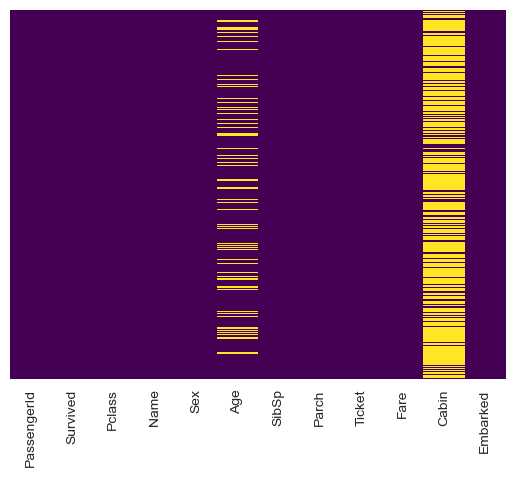

In [69]:
#sns.heatmap():seaborn libraryis used to plot rectangular data as a color-encoded matrix. #yticklables shows columns vise null values./ y-axis labels.
#cbar=False:No color bar is displayed; yellow represents missing values (True), and purple represents non-missing values (False).
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### Observation: Yellow-colored grids indicate missing values in the respective column.The 'Ages' and 'Cabin' columns have the highest number of missing values.
####

#### First, will thoroughly examine the data, gather insights, and then proceed to handle null values.

### 1. Basic Statistics: Passenger Count, Survival Rates, Age Distribution.

In [70]:
#Total no.of Passenger count:
passenger_count = titanic.shape[0]   #Used specifically extracts the number of rows in the DataFrame (not the dimensions of the DataFrame).
print(f"Total number of passengers: {passenger_count}")    #Used print() to print the total number of passengers using an f-string for concise string formatting.

Total number of passengers: 891


In [71]:
# Survival rates
survival_counts = titanic['Survived'].value_counts()
survival_rate = survival_counts[1] / passenger_count * 100
print(f"Survival rate: {survival_rate:.2f}%")            #Used to print the survival rate with a precision of two decimal places as a percentage using an f-string.

Survival rate: 38.38%


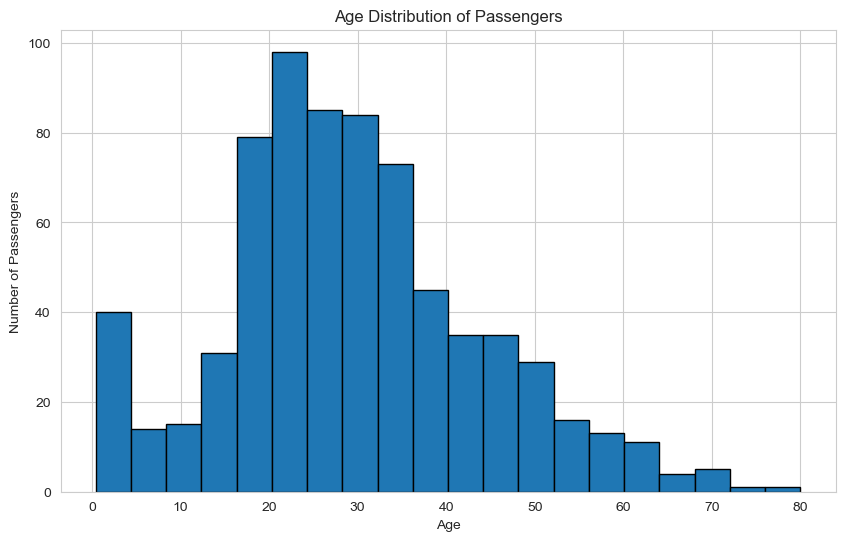

In [72]:
# Age distribution
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=20, edgecolor='black')  # Create a histogram of non-null ages from the 'Age' column in the 'titanic' DF, using 20 bins and black edges. 
# Create a histogram with 20 bins representing the distribution of non-null ages from the 'Age' column in the 'titanic' DataFrame.
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

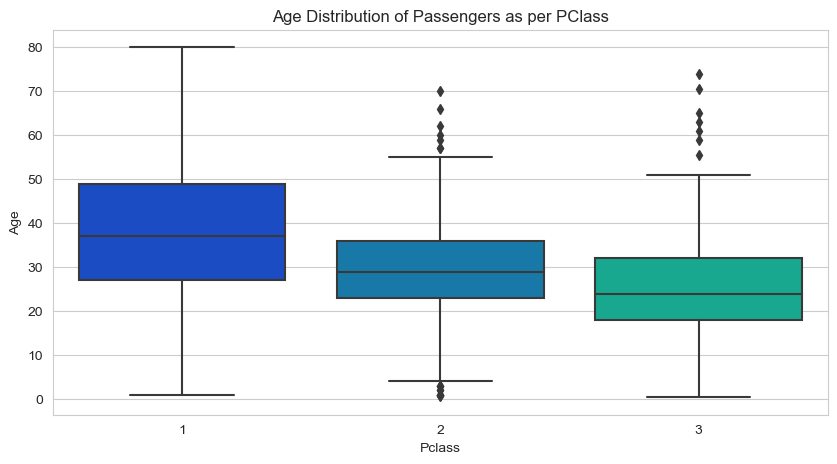

In [73]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter')
plt.title('Age Distribution of Passengers as per PClass')
plt.show()

### 2.Analyze survival rates based on gender, tickets class,  and age groups

In [74]:
# Survival rates based on gender
gender_survival = titanic.groupby('Sex')['Survived'].mean() * 100
print("Survival rates based on gender:")
print(gender_survival)

Survival rates based on gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [75]:
# Survival rates based on ticket class
class_survival = titanic.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rates based on ticket class:")
print(class_survival)


Survival rates based on ticket class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [76]:
# Create age groups
bins = [0, 18, 30, 50, 80]
labels = ['0-18', '19-30', '31-50', '51-80']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

In [77]:
# Survival rates based on age group
age_group_survival = titanic.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival rates based on age group:")
print(age_group_survival)


Survival rates based on age group:
AgeGroup
0-18     53.982301
19-30    35.055351
31-50    41.796875
51-80    35.616438
Name: Survived, dtype: float64


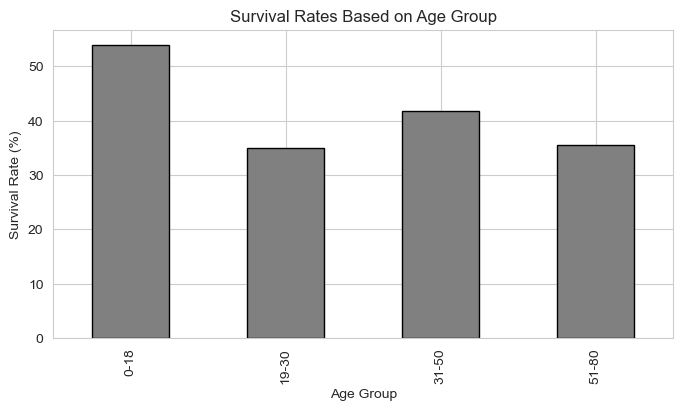

In [78]:
# Visualization of survival rates based on age group
plt.figure(figsize=(8, 4))
age_group_survival.plot(kind='bar', color='gray', edgecolor='black')
plt.title('Survival Rates Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()

### 3. Identify any missing or null values and devise strategeis for handling them¶

In [79]:
#check missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       178
dtype: int64

In [80]:
# Handling missing values
# Fill missing values with mean or median
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Fill missing values with a specific value
titanic['Cabin'].fillna('Unknown', inplace=True)

# For categorical data, fill missing values with the most frequent value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [81]:
#check again for any remaining missing values
missing_values = titanic.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
AgeGroup       178
dtype: int64


### 2 explore correlation: dose the fare correlate with survival? how does age relate to survival rates?

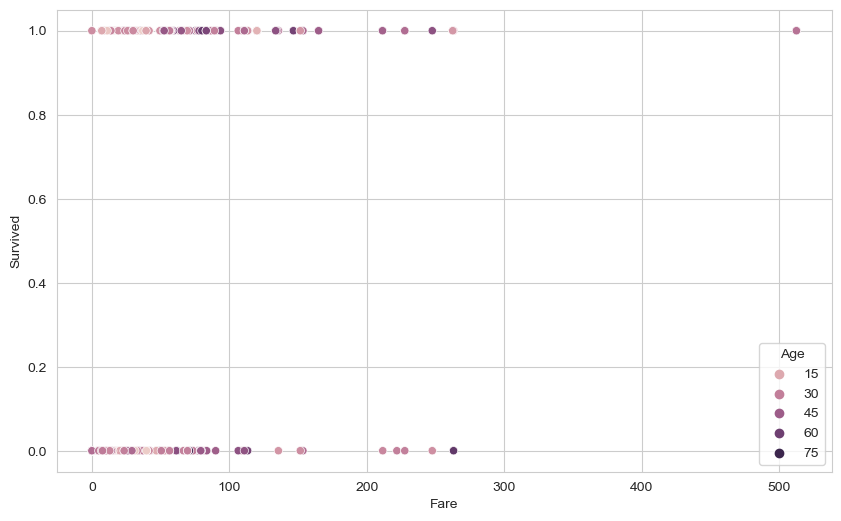

In [82]:
#The fare correlate with survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Survived', hue='Age', data=titanic)
plt.show()

In [83]:
# Calculate correlation between fare and survival
fare_survival_corr = titanic['Fare'].corr(titanic['Survived'])
print(f"\nCorrelation between Fare and Survival: {fare_survival_corr:.2f}")



Correlation between Fare and Survival: 0.26


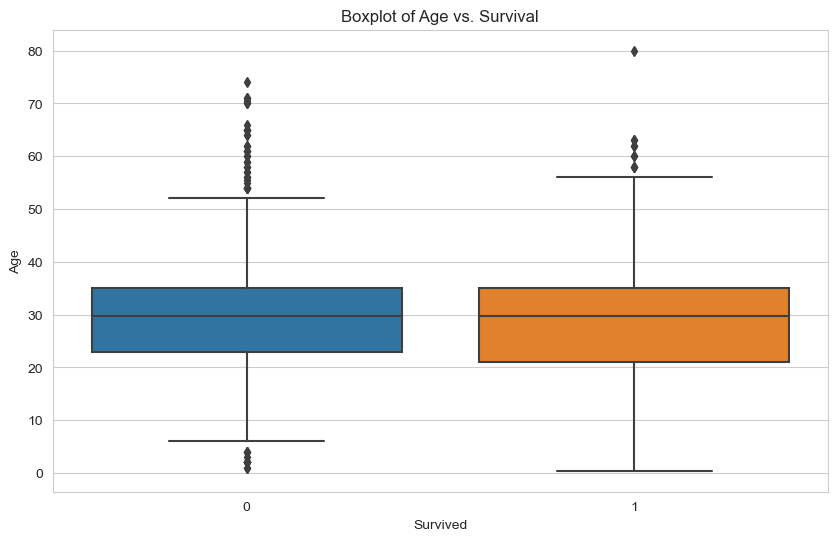

In [84]:
# relationship between age and survival rates using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Boxplot of Age vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [85]:
# Calculate correlation between age and survival
age_survival_corr = titanic['Age'].corr(titanic['Survived'])
print(f"\nCorrelation between Age and Survival: {age_survival_corr:.2f}")


Correlation between Age and Survival: -0.07


### 3.Visualize survival rates across different cabin classes and embarkation points

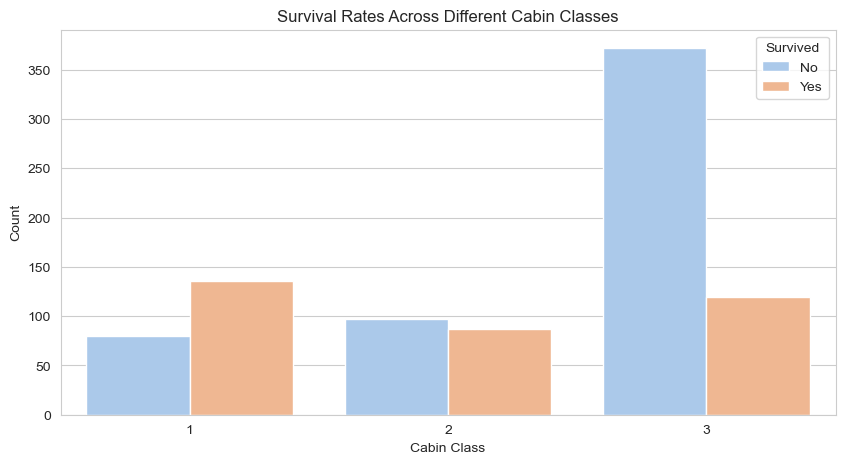

In [86]:
# Visualize survival rates across different cabin classes
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='pastel')
plt.title('Survival Rates Across Different Cabin Classes')
plt.xlabel('Cabin Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

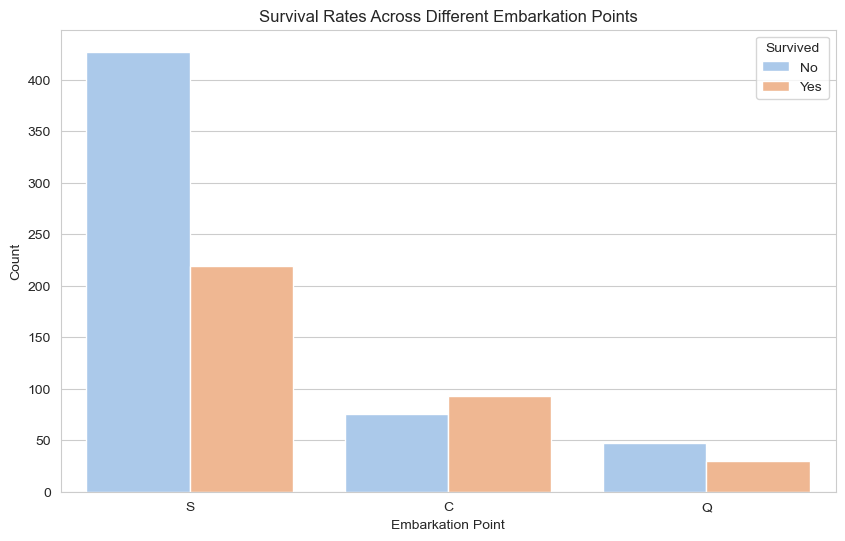

In [87]:
# Visualize survival rates across different embarkation points
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='pastel')
plt.title('Survival Rates Across Different Embarkation Points')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## Gather more in-depth details from the data:

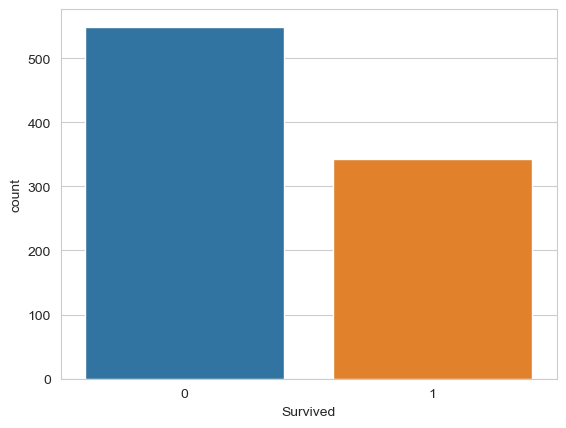

In [88]:
# Count of Survived passenger
sns.set_style('whitegrid')                  #Set the plotting style to 'whitegrid' for a clean and readable appearance
sns.countplot(x='Survived', data=titanic)   # Create a count plot to visualize the distribution of 'Survived' values.# on the x-axis, & use data from the 'titanic' df.
plt.show()

#### Observation: Out of the total 889 passengers, 549 did not survive, while 342 passengers survived.
#####

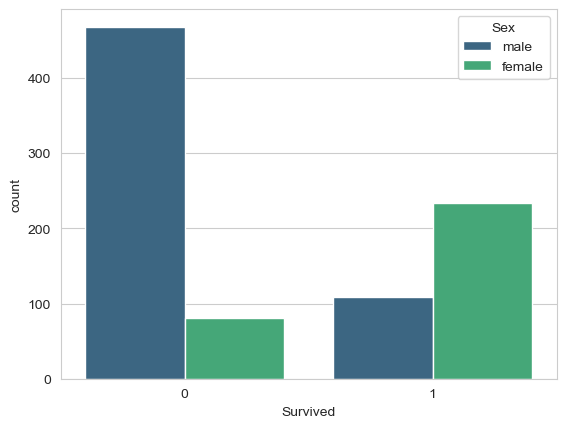

In [89]:
sns.set_style('whitegrid')
# Create a count plot to visualize the distribution of 'Survived' values # with 'Sex' as a hue, using data from the 'titanic' DataFrame
# The color palette 'viridis' is applied for visual appeal
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='viridis')
plt.show()

#### Observation: Out of the 549 passengers who did not survive, 468 were male and 81 were female. 
#### Meanwhile, out of the 342 passengers who survived, 109 were male, and 233 were female.
#####

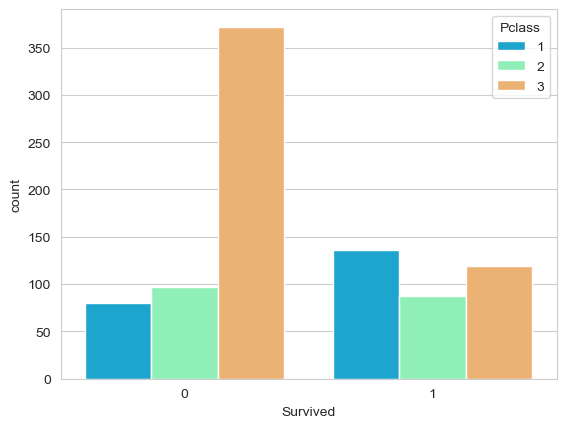

In [90]:
sns.set_style('whitegrid')   # Set the plotting style to 'whitegrid' for a clean and readable appearance
# Create a count plot to visualize the distribution of 'Survived' values # with 'Pclass' (Passenger Class) as a hue, using data from the 'titanic' DF. #The color palette 'rainbow' is applied for visual appeal
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='rainbow')
plt.show()

#### Observation: Out of the 549 passengers who did not survive, 80 were from the 1st class, 97 from the 2nd class, and 372 from the 3rd class.
#### Meanwhile, out of the 342 passengers who survived, 136 were from the 1st class, 87 from the 2nd class, and 119 from the 3rd class.
######

<Axes: xlabel='SibSp', ylabel='count'>

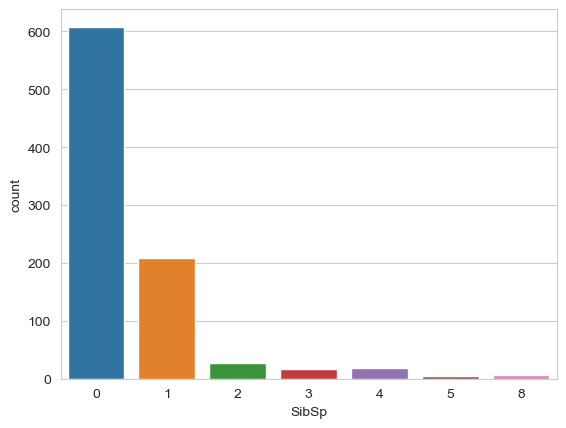

In [91]:
sns.countplot(x='SibSp', data=titanic)

#### Observation This countplot shows the number of passengers with their spouses and siblings.
######